In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from skimage import io, exposure, transform
from sqlalchemy import create_engine

%matplotlib inline
plt.rcParams['figure.figsize'] = [9, 6]
plt.rcParams['figure.dpi']= 100

In [2]:
# read data from sql to pandas dataframe
eng = create_engine('sqlite:///db/data.sqlite3', echo=False)
df = pd.read_sql("select * from data", eng)
eng.dispose()

df.head(3)

,data_caption,data_category,data_creator,height,id,location_standard,meta_data_alto,meta_data_set_key,meta_data_subject_description,meta_data_subject_url,region_height,region_width,region_x,region_y,width,img_url_hash
0,TAKES OLD POST IN ROCK ISLAND AGAIN\nGeneral A...,Photograph,,7615,5b58d934536f120001000899,http://s3.amazonaws.com/ndnp-jpeg-surrogates/i...,http://s3.amazonaws.com/ndnp-batches/iune_edit...,http://chroniclingamerica.loc.gov/lccn/sn92053...,"Rock Island Argus. May 11, 1917. Page 11",http://chroniclingamerica.loc.gov/lccn/sn92053...,1504.716868,814.684011,894.797097,476.345281,6064,5629d971fc66680f2d15def75a771466
1,CHARLES W. DYSON\nCharles W Dyson is one of th...,Photograph,HARRIS & EWING,6752,5b281840d6342b0001001ade,http://s3.amazonaws.com/ndnp-jpeg-surrogates/i...,http://s3.amazonaws.com/ndnp-batches/idhi_elio...,http://chroniclingamerica.loc.gov/lccn/sn86091...,"The Idaho recorder. January 25, 1918. Page 6",http://chroniclingamerica.loc.gov/lccn/sn86091...,1708.444852,731.516481,3067.632009,4294.709435,4592,ddde413d4a520c2617a3dbabd8bdab83
2,MAJ. HAROLD E. HARTLEY\nMaj. Harold Evans Hart...,Photograph,International Film Service,6680,5b281742d6342b0001001adc,http://s3.amazonaws.com/ndnp-jpeg-surrogates/i...,http://s3.amazonaws.com/ndnp-batches/idhi_elio...,http://chroniclingamerica.loc.gov/lccn/sn88056...,"The Challis messenger. October 30, 1918. Page 2",http://chroniclingamerica.loc.gov/lccn/sn88056...,1515.405322,689.619195,2301.653205,4221.172506,4432,62e4387a482e5feb28e0c367ffc453c0


In [3]:
row = df.sample(1).iloc[0]

fname = 'images/{}.jpg'.format(row.img_url_hash)
reg_x = row.region_x
reg_y = row.region_y
reg_w = row.region_width
reg_h = row.region_height
w = row.width
h = row.height

print(h, w)


9139 6732


(9139, 6732)

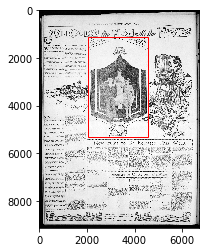

In [4]:
import matplotlib.patches as patches

img = mpimg.imread(fname)

fig, ax = plt.subplots(1)
ax.imshow(img, cmap='gray')
rect = patches.Rectangle((reg_x, reg_y), reg_w, reg_h, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

img.shape

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


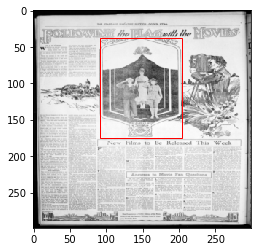

In [5]:
imgsm = transform.resize(img, (299, 299), anti_aliasing=True)
# imgsm = exposure.equalize_adapthist(imgsm, clip_limit=0.01)
# imgsm = exposure.rescale_intensity(imgsm)

# duplicate channels to fake an rgb image
imgsm = np.stack((imgsm,) * 3, -1)

x_scale = imgsm.shape[0] / w
y_scale = imgsm.shape[1] / h 
reg_xs = np.rint(x_scale * reg_x)
reg_ys = np.rint(y_scale * reg_y)
reg_ws = np.rint(x_scale * reg_w)
reg_hs = np.rint(y_scale * reg_h)

fig, ax = plt.subplots(1)
ax.imshow(imgsm) # don't need to specify grayscale, because it's a fake rgb image
rect = patches.Rectangle((reg_xs, reg_ys), reg_ws, reg_hs, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
